# MACHINE LEARNING PROJECT
## 1.0 Giới thiệu Project
1. Giới thiệu Dataset và Vấn đề Cần Giải Quyết:

Dataset trên là dữ liệu về khách hàng của một công ty viễn thông, bao gồm các thông tin cá nhân và các dịch vụ mà khách hàng đang sử dụng, cũng như tình trạng Churn (khách hàng rời bỏ dịch vụ). Mục tiêu của dự án là xây dựng một mô hình Machine Learning dự báo khả năng một khách hàng sẽ Churn hay không, dựa trên các đặc điểm cá nhân và mức độ sử dụng dịch vụ của khách hàng. Việc này giúp công ty có thể dự đoán trước và áp dụng các chiến lược giảm thiểu tỷ lệ khách hàng rời bỏ, qua đó tăng doanh thu và hiệu quả dịch vụ.

2. Giải thích Dataset:
- CustomerID: Mã định danh của từng khách hàng.
- Gender: Giới tính của khách hàng (Male/Female).
- SeniorCitizen: Cho biết khách hàng có phải là người cao tuổi (SeniorCitizen = 1) hay không (SeniorCitizen = 0).
- Partner: Tình trạng hôn nhân của khách hàng (Yes/No).
- Dependents: Khách hàng có người phụ thuộc (Yes) hay không (No).
- Tenure: Số tháng khách hàng đã gắn bó với công ty.
- PhoneService: Khách hàng có sử dụng dịch vụ điện thoại hay không (Yes/No).
- MultipleLines: Khách hàng có nhiều đường dây điện thoại không (Yes/No/No phone service).
- InternetService: Loại dịch vụ Internet mà khách hàng sử dụng (DSL, Fiber optic, hoặc No).
- OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies: Các dịch vụ bổ sung mà khách hàng có sử dụng hay không (Yes/No).
- Contract: Loại hợp đồng của khách hàng, như hợp đồng tháng (Month-to-month), hợp đồng một năm (One year), hoặc hợp đồng hai năm (Two year).
- PaperlessBilling: Hóa đơn điện tử (Yes) hoặc hóa đơn giấy (No).
- PaymentMethod: Phương thức thanh toán, như chuyển khoản ngân hàng tự động, thanh toán qua séc, hoặc thanh toán qua thẻ tín dụng.
- MonthlyCharges: Phí dịch vụ hàng tháng.
- TotalCharges: Tổng chi phí từ trước tới nay mà khách hàng đã trả.
- Churn: Mục tiêu cần dự đoán, xác định khách hàng có rời bỏ dịch vụ (Yes) hay không (No).

3. Mục Tiêu Dự Án:

Mục tiêu của dự án là tìm kiếm mô hình Machine Learning phù hợp để dự báo liệu rằng khách hàng có rời bỏ dịch vụ hay không? Thiết lập bộ tham số tối ưu, lựa chọn các đặc trưng (features) có giá trị dự báo cao, và xây dựng pipeline tự động nhằm giúp công ty có thể dự báo hiệu quả khả năng khách hàng sẽ rời bỏ dịch vụ (churn) dựa trên dữ liệu hiện có. Pipeline này sẽ cho phép công ty dễ dàng áp dụng mô hình vào hệ thống Business Intelligence, hỗ trợ các chiến lược giữ chân khách hàng kịp thời và chính xác.

4. Các bước thực hiện:

- Khám Phá và Xử Lý Dữ Liệu
- Lựa Chọn Đặc Trưng (Feature Selection)
- Sử dụng K-Folk đánh giá độ ổn định mô hình
- Thiết Lập Pipeline Tự Động
- Tìm Kiếm Mô Hình và Bộ Tham Số Tối Ưu

## 1.1 Giả sử chọn mô hình Logistics Regression:pre-procesing dataset, xây dựng mô hình

### 1.1.A Nhập thư viện và tiền xử lý dữ liệu

In [2]:
# Nhập thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv(r'c:\Users\Dell03.LAPTOP-PTNNLMOI\Desktop\SANG\Machine Learning\Midterm_K298-20241027T013250Z-001\Midterm_K298\GK_ML_K298_Nguyen_Dinh_Sang\telco_customer_churn.csv')

In [4]:
#5 dòng đầu dataset
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Thông tin dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Cột TotalChages dường như có loại dữ liệu float64
df['TotalCharges']


0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [7]:
# Chuyển đổi dữ liệu TotalChages sang kiểu số
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
# Trình bày thông tin dataset 1 lần nữa
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


=> Các cột đã đúng loại dữ liệu và không có dữ liệu null

In [9]:
# 5 dòng đầu tiên
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Kiểm tra các dữ liệu lỗi
df.isna().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

=> Có dữ liệu lỗi ở cột TotalCharges, thay thế lỗi bằng trung bình của cột

In [11]:
# Thay thế lỗi bằng dữ liệu trung bình của feature
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [12]:
# Kiểm tra lỗi một lần nữa
df.isna().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

=> Dataset đã không còn lỗi

In [13]:
# Thống kê các cột số trong dataset
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


=> Các cột số không có cùng loại đơn vị, có thể sẽ cần scale

In [14]:
# Kiểm tra các cột category trong dataset
columns_to_count = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# In các dữ liệu của các cột category
for col in columns_to_count:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")


Value counts for MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Value counts for OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Value counts for OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

Value counts for DeviceProtection:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

Value counts for TechSupport:
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

Value counts for StreamingTV:
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

Value counts for StreamingMovies:
StreamingMovies
No                 

=> Thay thế các giá trị "No intertnet service" và "No phone service" thành "No"

In [15]:
# Thay thế "No phone service" bằng "No" ở cột 'MultipleLines'
df['MultipleLines'] = df['MultipleLines'].str.replace("No phone service", "No", case=False, regex=False)

# Thay thế "No internet service" bằng "No" ở cột: 'OnlineSecurity', 'OnlineBackup' 
df['OnlineSecurity'] = df['OnlineSecurity'].str.replace("No internet service", "No", case=False, regex=False)
df['OnlineBackup'] = df['OnlineBackup'].str.replace("No internet service", "No", case=False, regex=False)
df['DeviceProtection'] = df['DeviceProtection'].str.replace("No internet service", "No", case=False, regex=False)
df['TechSupport'] = df['TechSupport'].str.replace("No internet service", "No", case=False, regex=False)
df['StreamingTV'] = df['StreamingTV'].str.replace("No internet service", "No", case=False, regex=False)
df['StreamingMovies'] = df['StreamingMovies'].str.replace("No internet service", "No", case=False, regex=False)

In [16]:
# Show 5 dòng đầu 1 lần nữa
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
#Đếm kết quả đầu ra cần dự báo của dataset
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

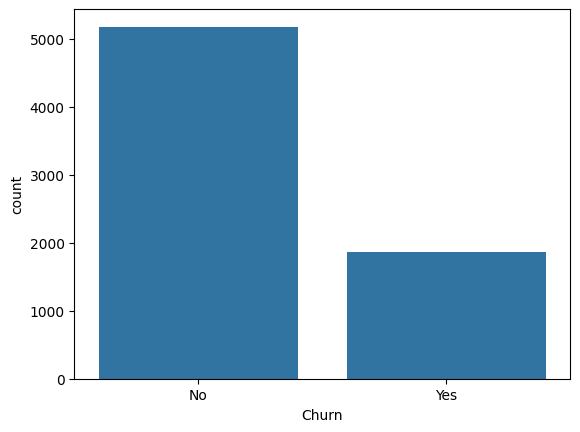

In [18]:
import seaborn as sns
# Trực quan 'Churn'
sns.countplot(data=df, x='Churn')
plt.show()


=> Cho thấy sự bất cân bằng trong dữ liệu đầu ra

In [19]:
# Chuyển đổi output 'Churn' thành 1 hoặc 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [20]:
# Chuyển đổi One-hot encoding các cột category

for column in ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Contract', 'InternetService', 'PaymentMethod']:
    insert_loc = df.columns.get_loc(column)
    df = pd.concat([df.iloc[:,:insert_loc], pd.get_dummies(df.loc[:, [column]]), df.iloc[:,insert_loc+1:]], axis=1)

In [21]:
# Show 5 dòng dữ liệu của dataset
df.head()

,CustomerID,Gender_Female,Gender_Male,SeniorCitizen,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Tenure,PhoneService_No,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,True,False,0,False,True,True,False,1,True,...,False,False,True,False,False,True,False,29.85,29.85,0
1,5575-GNVDE,False,True,0,True,False,True,False,34,False,...,False,True,False,False,False,False,True,56.95,1889.50,0
2,3668-QPYBK,False,True,0,True,False,True,False,2,False,...,False,False,True,False,False,False,True,53.85,108.15,1
3,7795-CFOCW,False,True,0,True,False,True,False,45,True,...,False,True,False,True,False,False,False,42.30,1840.75,0
4,9237-HQITU,True,False,0,True,False,True,False,2,False,...,False,False,True,False,False,True,False,70.70,151.65,1


### 1.1.B Tách dữ liệu và tạo model

In [22]:
# Chọn cột Input, không sử dụng Customer ID vì nó không hữu hiệu, và Output là Churn
# Tạo X bao gồm tất cả các cột trừ 'CustomerID' và 'Churn'
X = df.drop(columns=['CustomerID', 'Churn'])  
# Tạo y bao gồm cột 'Churn'
y = df['Churn']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
# Show X_train
X_train.head()

,Gender_Female,Gender_Male,SeniorCitizen,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Tenure,PhoneService_No,PhoneService_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,TotalCharges
1695,False,True,0,False,True,False,True,54,False,True,...,True,False,False,True,False,False,True,False,70.70,3770.00
1095,False,True,0,True,False,True,False,1,False,True,...,False,False,False,True,False,False,True,False,80.55,80.55
3889,False,True,0,True,False,True,False,13,False,True,...,True,False,True,False,False,True,False,False,19.30,259.65
3667,True,False,1,False,True,False,True,24,False,True,...,False,True,False,True,False,False,True,False,96.55,2263.45
2902,True,False,1,True,False,True,False,6,False,True,...,False,False,False,True,False,False,True,False,74.10,450.90


In [24]:
from sklearn.preprocessing import StandardScaler

# Cột cần scale
scale_columns = ['Tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_train[scale_columns] = scaler.fit_transform(X_train[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])


In [25]:
from sklearn.linear_model import LogisticRegression
# Học mô hình và sử dụng lớp LogisticRegression, class_weight = balanced bởi vì đầu ra không cân bằng
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

### 1.1.C Đánh giá mô hình

In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Đánh giá mô hình
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7567439659252247
F1 Score: 0.6517615176151762
Precision: 0.5332594235033259
Recall: 0.837979094076655


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# In classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1539
           1       0.53      0.84      0.65       574

    accuracy                           0.76      2113
   macro avg       0.73      0.78      0.73      2113
weighted avg       0.82      0.76      0.77      2113



In [28]:
# In confusion matrix
print(confusion_matrix(y_test, y_pred))

[[1118  421]
 [  93  481]]


**Kết luận:**
- Độ chính xác tổng thể đạt 76%, cho thấy mô hình có hiệu quả khá tốt nhưng vẫn cần cải thiện.
- Recall cao (0.84) cho lớp 1, giúp mô hình nhận diện hầu hết các trường hợp dương tính.
- Precision thấp (0.53) cho lớp 1, có nghĩa là nhiều dự đoán nhãn dương bị sai, dẫn đến dương tính giả cao.
- Mất cân bằng giữa precision và recall, phù hợp nếu ưu tiên phát hiện các trường hợp rủi ro (dương tính thực).

=> Khuyến nghị: Có thể điều chỉnh threshold hoặc thử các mô hình khác để cải thiện hiệu suất.

---------------------------

## 1.2 Sử dụng kỹ thuật K-fold Cross Validation để đánh giá độ ổn định của model Logistic Regression

In [29]:
# Sử dụng K Fold cross validation với cv=5 - tách dataset thành 5 tập validation set để kiêm tra tính ổn định
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.72920892 0.72210953 0.74036511 0.72616633 0.7474645 ]
Mean score: 0.7330628803245436
Standard deviation: 0.009414037635596187


Kết luận từ các thông số:

- Độ chính xác trung bình (Mean score): Mô hình có độ chính xác trung bình là khoảng 73.3% trên tập huấn luyện, cho thấy mô hình có hiệu suất ổn định.

- Độ lệch chuẩn thấp (Standard deviation): Độ lệch chuẩn là 0.0094 (tức khoảng 0.94%), chứng tỏ kết quả của các lần chạy khá đồng đều, không có sự biến động lớn giữa các lần phân chia dữ liệu khác nhau.

=> Hiệu suất ổn định: Với độ lệch chuẩn thấp, mô hình thể hiện khả năng ổn định, ít bị ảnh hưởng bởi cách dữ liệu được chia trong các lần huấn luyện và kiểm tra.

=> Không có hiện tượng overfitting rõ rệt: Các chỉ số cho thấy mô hình không có dấu hiệu rõ ràng của overfitting, vì độ chính xác nhất quán trong từng lần chạy.

=> Tiềm năng cải thiện: Độ chính xác trung bình ở mức 73.3% cho thấy mô hình có thể cần được cải thiện thêm về tính chính xác, ví dụ thông qua việc tối ưu hóa hyperparameter hoặc xử lý thêm các đặc trưng (feature engineering).

----------------------------------------------------

## 1.3 Lưu Logistics model và các bước Preprocesing data vào Pipeline

In [30]:
# Import thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import pickle


### 1.3.A Tạo Pipeline

In [31]:
# Bước 1: Đọc dataframe
df = pd.read_csv(r'c:\Users\Dell03.LAPTOP-PTNNLMOI\Desktop\SANG\Machine Learning\Midterm_K298-20241027T013250Z-001\Midterm_K298\GK_ML_K298_Nguyen_Dinh_Sang\telco_customer_churn.csv')

In [32]:
# Bước 2: Tiền xử lý dữ liệu ban đầu
def initial_preprocessing(df):
    # Convert 'TotalCharges' to numeric, replacing errors with NaN
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    # Fill missing values in 'TotalCharges' with mean
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
    
    # Replace specific values in categorical columns
    replace_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in replace_columns:
        df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})
    
    # Trả về DataFrame đã xử lý
    return df

# Áp dụng tiền xử lý ban đầu trên DataFrame
df = initial_preprocessing(df)

In [33]:
# Tách dữ liệu thành input và output
X = df.drop(columns=['CustomerID', 'Churn'])  
y = df['Churn']

# Xác định các nhóm cột
scale_columns = ['Tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Contract', 'InternetService', 'PaymentMethod']


In [34]:
# Bước 3: Xây dựng các bước tiền xử lý trong pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), scale_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ], remainder='passthrough'
)

In [35]:
# Bước 4: Xây dựng pipeline hoàn chỉnh bao gồm tiền xử lý và mô hình LogisticRegression
pipeline = Pipeline(steps=[
    ('initial_preprocessing', FunctionTransformer(initial_preprocessing)),  # Thêm bước xử lý dữ liệu ban đầu
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

In [36]:
# Bước 5: Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
# Bước 6: Huấn luyện pipeline trên tập huấn luyện
pipeline.fit(X_train, y_train)


C:\Users\Dell03.LAPTOP-PTNNLMOI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('initial_preprocessing',
                 FunctionTransformer(func=<function initial_preprocessing at 0x000002A6EF4E77E0>)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'Contract',
                                                   'InternetService',
                                                   'PaymentMethod'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [38]:
# Bước 7: Lưu pipeline vào file
with open('telco_churn_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

### 1.3.B Tải lại pipeline dự báo trên tập Test

In [39]:
# Tải lại pipeline từ file .pkl
with open('telco_churn_pipeline.pkl', 'rb') as file:
    pipeline = pickle.load(file)


# Dự đoán bằng pipeline đã tải
predictions = pipeline.predict(X_test)
print("Dự đoán:", predictions)

Dự đoán: ['Yes' 'No' 'No' ... 'No' 'Yes' 'No']


------------------------------

## 1.4  Xác định thuật toán ML với bộ tham số tối ưu

### 1.4.A Tiền xử lý dữ liệu

In [40]:
# Đọc dataframe
df = pd.read_csv(r'c:\Users\Dell03.LAPTOP-PTNNLMOI\Desktop\SANG\Machine Learning\Midterm_K298-20241027T013250Z-001\Midterm_K298\GK_ML_K298_Nguyen_Dinh_Sang\telco_customer_churn.csv')

In [41]:
# Chuyển đổi dữ liệu TotalChages sang kiểu số
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [42]:
# Thay thế lỗi bằng dữ liệu trung bình của feature
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [43]:
# Thay thế "No phone service" bằng "No" ở cột 'MultipleLines'
df['MultipleLines'] = df['MultipleLines'].str.replace("No phone service", "No", case=False, regex=False)

# Thay thế "No internet service" bằng "No" ở cột: 'OnlineSecurity', 'OnlineBackup' 
df['OnlineSecurity'] = df['OnlineSecurity'].str.replace("No internet service", "No", case=False, regex=False)
df['OnlineBackup'] = df['OnlineBackup'].str.replace("No internet service", "No", case=False, regex=False)
df['DeviceProtection'] = df['DeviceProtection'].str.replace("No internet service", "No", case=False, regex=False)
df['TechSupport'] = df['TechSupport'].str.replace("No internet service", "No", case=False, regex=False)
df['StreamingTV'] = df['StreamingTV'].str.replace("No internet service", "No", case=False, regex=False)
df['StreamingMovies'] = df['StreamingMovies'].str.replace("No internet service", "No", case=False, regex=False)

In [44]:
# Chuyển đổi One-hot encoding các cột category

for column in ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Contract', 'InternetService', 'PaymentMethod']:
    insert_loc = df.columns.get_loc(column)
    df = pd.concat([df.iloc[:,:insert_loc], pd.get_dummies(df.loc[:, [column]]), df.iloc[:,insert_loc+1:]], axis=1)

In [45]:
# Tạo X bao gồm tất cả các cột trừ 'CustomerID' và 'Churn'
X = df.drop(columns=['CustomerID', 'Churn'])  
# Tạo y bao gồm cột 'Churn'
y = df['Churn'].map({'Yes': 1, 'No': 0})
# Split df
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler

# Cột cần scale
scale_columns = ['Tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_train[scale_columns] = scaler.fit_transform(X_train[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])


Thử các model khác nhau

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier # Random Forest, AdaBoost
import xgboost as xgb # XGBoost
from sklearn.model_selection import GridSearchCV
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore') 

In [48]:
# List the model
models = [KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier(), SVC(), AdaBoostClassifier(),  xgb.XGBClassifier()]
scores = []
train_times = []
names = []

for model in models:
    start = time.time()
    scores.append(cross_val_score(estimator = model, X = X_train, y = y_train, scoring="accuracy", cv=5).mean())
    end = time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)

df = pd.DataFrame(scores, columns=['score'], index=range(len(models)))
df.insert(1,'Time', pd.Series(train_times))
df.insert(0,'Model', pd.Series(names))
df.head(10)

,Model,score,Time
0,KNeighborsClassifier,0.763489,0.403502
1,RandomForestClassifier,0.782353,2.060247
2,DecisionTreeClassifier,0.729412,0.118884
3,SVC,0.798783,2.955960
4,AdaBoostClassifier,0.798174,1.103946
5,XGBClassifier,0.782556,0.652992


Ở đây chưa chọn được dựa trên score và time và cần sử dụng phương pháp Grid Search (Chạy các bộ tham số) vì các bộ tham số có thể dẫn đến việc tối ưu của các mô hình

### 1.4.B Chạy vòng lặp với các bộ tham số cho từng model

In [49]:
# Danh sách các mô hình và tham số
model_params = [
    {
        'name': 'KNN',
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
            'weights': ['uniform', 'distance'],
            'metric': ['minkowski', 'euclidean', 'manhattan']
        }
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 5, 10],
            'max_features': ['auto', 'sqrt', 'log2']
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(n_jobs=-1),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2']
        }
    },
    {
        'name': 'AdaBoost',
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [100, 150, 200],
            'learning_rate': [0.01, 0.1, 1.0],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    },
    {
        'name': 'XGBoost',
        'model': xgb.XGBClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }
]

# Danh sách lưu trữ kết quả
results = []

# Vòng lặp qua các mô hình và thực hiện GridSearchCV
for mp in model_params:
    model_name = mp['name']
    model = mp['model']
    params = mp['params']
    
    # Thời gian bắt đầu
    start_time = time.time()
    
    # GridSearchCV
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Thời gian kết thúc
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Lưu kết quả
    results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Best Score': grid_search.best_score_,
        'Time': elapsed_time
    })

# Chuyển kết quả thành DataFrame
df_results = pd.DataFrame(results)
print(df_results)

           Model                                    Best Parameters  \
0            KNN  {'metric': 'minkowski', 'n_neighbors': 15, 'we...   
1  Decision Tree  {'max_depth': 10, 'max_features': 'sqrt', 'min...   
2  Random Forest  {'max_depth': 10, 'max_features': 'sqrt', 'min...   
3       AdaBoost  {'algorithm': 'SAMME.R', 'learning_rate': 0.1,...   
4        XGBoost  {'colsample_bytree': 1.0, 'learning_rate': 0.1...   

   Best Score        Time  
0    0.787221   10.142715  
1    0.785193    2.617498  
2    0.805274  258.366282  
3    0.797972   49.332546  
4    0.806085  131.347642  


In [50]:
# Cấu hình để in đầy đủ nội dung trong các cột
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
# Lọc DataFrame cho 3 mô hình đã kết luận: XGBoost, AdaBoost, và Random Forest
selected_models = df_results[df_results['Model'].isin(['XGBoost', 'AdaBoost'])]

# In kết quả của 3 mô hình
print("Các model có score và hiệu suất cao nhất: ", selected_models)


Các model có score và hiệu suất cao nhất:        Model  \
3  AdaBoost   
4   XGBoost   

                                                                                          Best Parameters  \
3                                     {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}   
4  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}   

   Best Score        Time  
3    0.797972   49.332546  
4    0.806085  131.347642  


Kết luận
- Lựa chọn ưu tiên: XGBoost (cao nhất về độ chính xác), trong trường hợp có thể chấp nhận thời gian huấn luyện lâu.
- Thay thế: AdaBoost (trong trường hợp muốn cân bằng độ chính xác và thời gian).

=> XGBoost có vẻ là lựa chọn tối ưu nhất dựa trên độ chính xác và thời gian xử lý.


------------------


## 1.5. Chọn thuật toán Model XGBoost, tìm 10 features quan trọng để thực hiện tối ưu model

In [51]:
# Import thư viện
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
# Load và tiền xử lý dữ liệu
df = pd.read_csv(r'c:\Users\Dell03.LAPTOP-PTNNLMOI\Desktop\SANG\Machine Learning\Midterm_K298-20241027T013250Z-001\Midterm_K298\GK_ML_K298_Nguyen_Dinh_Sang\telco_customer_churn.csv')

# Tiền xử lý dữ liệu ban đầu bằng cách gọi hàm đã khai báo ở 1.3 Tạo Pipeline
initial_preprocessing(df)

# Tách input và output
X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn']


In [65]:
# Định nghĩa các cột để scale và one-hot encode
scale_columns = ['Tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = [
    'Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Contract',
    'InternetService', 'PaymentMethod'
]

# Cấu hình tiền xử lý
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), scale_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ], remainder='passthrough'
)

# Áp dụng tiền xử lý cho X
X_processed = preprocessor.fit_transform(X)


In [66]:
from sklearn.preprocessing import LabelEncoder

# Chuyển đổi nhãn y từ 'No' và 'Yes' sang 0 và 1
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.3, random_state=42)

# Huấn luyện model XGBoost với các tham số tối ưu
xgb_model = xgb.XGBClassifier(
    colsample_bytree=1.0, 
    learning_rate=0.1, 
    max_depth=3, 
    n_estimators=100, 
    subsample=1.0
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Top 10 features quan trọng:
                                Feature  Importance
17     cat__InternetService_Fiber optic    0.259979
15               cat__Contract_One year    0.180683
16               cat__Contract_Two year    0.167422
18              cat__InternetService_No    0.084420
0                           num__Tenure    0.053689
20  cat__PaymentMethod_Electronic check    0.050469
13             cat__StreamingMovies_Yes    0.044409
14            cat__PaperlessBilling_Yes    0.021974
8               cat__OnlineSecurity_Yes    0.021936
22             remainder__SeniorCitizen    0.015157


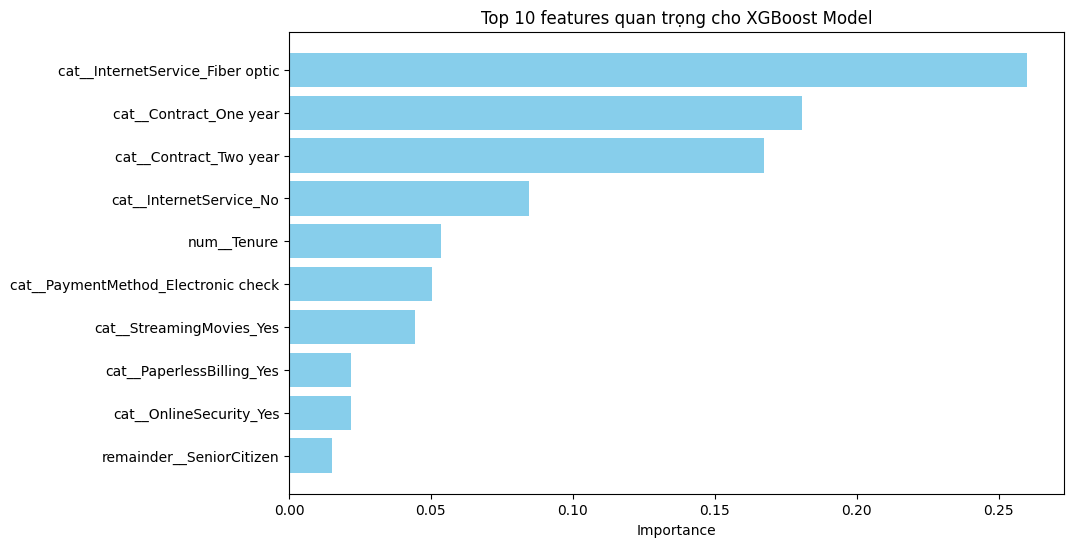

In [67]:
# Lấy các độ quan trọng của các feature
importance = xgb_model.feature_importances_

# Chuyển thành DataFrame và sắp xếp để lấy top 10
features = preprocessor.get_feature_names_out()
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
top_10_features = importance_df.sort_values(by='Importance', ascending=False).head(10)
print("Top 10 features quan trọng:")
print(top_10_features)

# Vẽ biểu đồ cho 10 feature quan trọng nhất
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Top 10 features quan trọng cho XGBoost Model")
plt.gca().invert_yaxis()
plt.show()


Từ top 10 features, có thể thấy rằng các yếu tố về loại dịch vụ Internet (đặc biệt là Fiber optic) và thời hạn hợp đồng (hai năm, một năm) có tác động lớn nhất đến Kết quả Churn, cho thấy rằng chất lượng dịch vụ và cam kết dài hạn có ảnh hưởng mạnh mẽ đến quyết định của khách hàng. Những yếu tố khác như dịch vụ hỗ trợ (PhoneService, TechSupport) và tiện ích bổ sung (StreamingMovies, OnlineSecurity) đóng vai trò quan trọng nhưng ít hơn, gợi ý rằng sự hài lòng với các dịch vụ kèm theo cũng góp phần giữ chân khách hàng.

In [68]:
from sklearn.metrics import accuracy_score, classification_report

# Lấy danh sách các cột top 10 features
top_10_feature_names = top_10_features['Feature'].values

# Lọc lại dữ liệu chỉ với 10 feature quan trọng nhất
X_top_10 = X_processed[:, [features.tolist().index(f) for f in top_10_feature_names]]

# Chia dữ liệu mới thành tập huấn luyện và tập kiểm tra
X_train_top_10, X_test_top_10, y_train_top_10, y_test_top_10 = train_test_split(X_top_10, y_encoded, test_size=0.3, random_state=42)

# Huấn luyện model XGBoost với 10 feature quan trọng nhất

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1]) # Xử lý sự mất cân bằng của output

xgb_model_top_10 = XGBClassifier(
    scale_pos_weight=scale_pos_weight, # Xử lý sự mất cân bằng của output
    colsample_bytree=1.0, 
    learning_rate=0.1, 
    max_depth=3, 
    n_estimators=100, 
    subsample=1.0
)
xgb_model_top_10.fit(X_train_top_10, y_train_top_10)

# Dự đoán trên tập kiểm tra
y_pred_top_10 = xgb_model_top_10.predict(X_test_top_10)

# Đánh giá model
accuracy = accuracy_score(y_test_top_10, y_pred_top_10)
report = classification_report(y_test_top_10, y_pred_top_10)

print(f"Accuracy của model với 10 feature quan trọng nhất: {accuracy}")
print("Classification Report:")
print(report)

Accuracy của model với 10 feature quan trọng nhất: 0.751538097491718
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1539
           1       0.53      0.84      0.65       574

    accuracy                           0.75      2113
   macro avg       0.73      0.78      0.73      2113
weighted avg       0.82      0.75      0.76      2113



Dựa vào Accuracy và Classification Report, có một số nhận xét sau:

Model đạt được 75.14% độ chính xác, cho thấy hiệu quả tương đối tốt trong việc phân loại với chỉ 10 feature quan trọng nhất.
Tuy nhiên, độ chính xác này có phần thấp hơn so với các model thường sử dụng toàn bộ feature.

- Class 0 (Không Churn) có độ chính xác cao hơn (92%), cho thấy model tốt trong việc nhận diện các khách hàng sẽ không rời bỏ dịch vụ.
- Class 1 (Churn) có độ chính xác chỉ đạt 53%, điều này nghĩa là model dễ nhầm các khách hàng có khả năng rời bỏ dịch vụ (Churn) với các khách hàng không rời bỏ.

Kết luận:
- Model này đạt hiệu quả tốt trong việc dự đoán khách hàng không rời bỏ, nhưng vẫn gặp hạn chế khi phát hiện các khách hàng có khả năng rời bỏ dịch vụ.
- Có thể sử dụng thêm nhiều feature hoặc tối ưu lại các feature được lựa chọn.